# Make attention work
* Move attention to upper level

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

2023-03-13 14:17:35.597246: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 14:17:44.883926: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 14:17:44.884195: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 14:17:52.198738: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

170498071/170498071 [==============================] - 167s 1us/step


In [2]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"y_train shape: {y_train.shape}")

y_train shape: (50000, 10)


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
# Adding Attention Layer
attention_probs = layers.Dense(32, activation='sigmoid')(x)
attention_mul = layers.multiply([x, attention_probs])
x = layers.MaxPooling2D(pool_size=(2, 2))(attention_mul)

x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

2023-03-13 14:21:01.164317: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-13 14:21:01.175981: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-13 14:21:01.179858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3a4d846ee971): /proc/driver/nvidia/version does not exist
2023-03-13 14:21:01.210442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30, 30, 32)   1056        ['conv2d[0][0]']                 
                                                                                                  
 multiply (Multiply)            (None, 30, 30, 32)   0           ['conv2d[0][0]',                 
                                                                  'dense[0][0]']              

In [4]:
# enlarge `batch_size`, try to make it easier to converge
batch_size = 256
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
176/176 [==============================] - 114s 622ms/step - loss: 4.2104 - accuracy: 0.1065 - val_loss: 2.2769 - val_accuracy: 0.1360
Epoch 2/50
176/176 [==============================] - 90s 510ms/step - loss: 2.1398 - accuracy: 0.2124 - val_loss: 1.9372 - val_accuracy: 0.2864
Epoch 3/50
176/176 [==============================] - 85s 481ms/step - loss: 1.9133 - accuracy: 0.2754 - val_loss: 1.7806 - val_accuracy: 0.3262
Epoch 4/50
176/176 [==============================] - 159s 908ms/step - loss: 1.8285 - accuracy: 0.3094 - val_loss: 1.7449 - val_accuracy: 0.3590
Epoch 5/50
176/176 [==============================] - 101s 573ms/step - loss: 1.7841 - accuracy: 0.3396 - val_loss: 1.6483 - val_accuracy: 0.4050
Epoch 6/50
176/176 [==============================] - 102s 580ms/step - loss: 1.7080 - accuracy: 0.3715 - val_loss: 1.5853 - val_accuracy: 0.4250
Epoch 7/50
176/176 [==============================] - 88s 500ms/step - loss: 1.6334 - accuracy: 0.4013 - val_loss: 1.4453 - va

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(32, 32, 3)
1/1 [==============================] - 0s 39ms/step


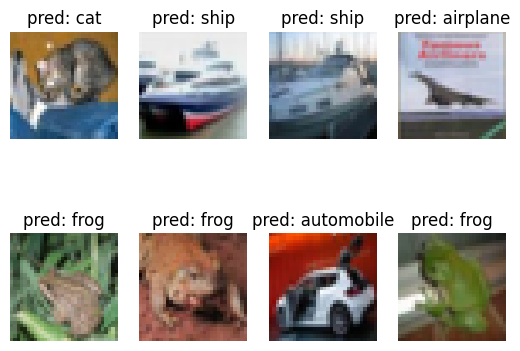

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def translate(p):
    labels = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    return labels[p]
    
def convert_prediction(p):
    return translate(p[0].index(max(p[0])))

print(y_test[0])
print(x_test[0].shape)

for i in range(8):
    pred = model.predict(np.array([x_test[i]]))
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[i], interpolation='nearest')
    plt.title(f"pred: {convert_prediction(pred.tolist())}")
    plt.axis("off")

plt.show()   

layer 0 name: input_1
layer 1 name: conv2d


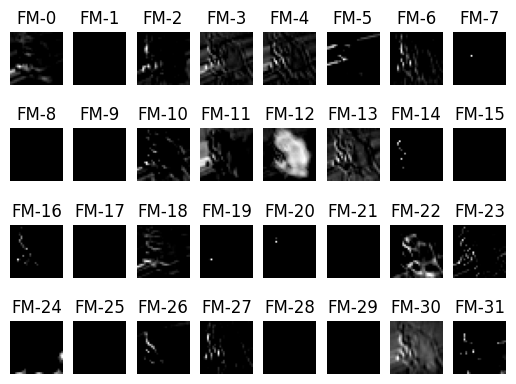

In [6]:
img = x_test[7]

print(f"layer 0 name: {model.layers[0].name}")
print(f"layer 1 name: {model.layers[1].name}")

get_conv2d_2_output = keras.backend.function([model.layers[0].input], [model.layers[1].output])
conv2d_2_output = get_conv2d_2_output(np.array([img]))[0]

fig, axs = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(conv2d_2_output[0, :, :, i], cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title(f'FM-{i}') #FM: feature map

plt.show()

layer 2 name: dense
layer 3 name: multiply
1/1 [==============================] - 0s 246ms/step


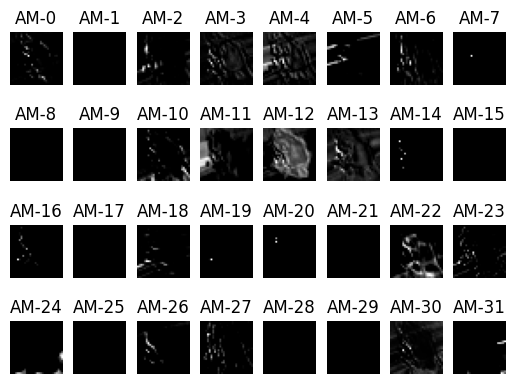

In [16]:
print(f"layer 2 name: {model.layers[2].name}")
print(f"layer 3 name: {model.layers[3].name}")

img = x_test[7]

attention_model = keras.Model(inputs=model.input, outputs=model.layers[3].output)
activation_maps = attention_model.predict(np.array([img]))

fig, axs = plt.subplots(4, 8)
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(activation_maps[0, :, :, i * 8 + j], cmap='gray')
        axs[i, j].axis("off")
        axs[i, j].set_title(f"AM-{i * 8 + j}")
plt.show()

(1, 30, 30)


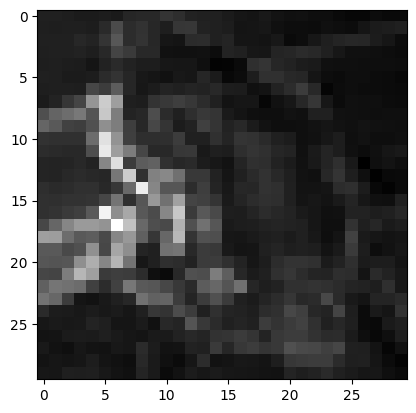

In [17]:
mean_attention_map = np.mean(activation_maps, axis=-1)

# Normalize the attention map so that its values are between 0 and 1
max_val = np.max(mean_attention_map)
min_val = np.min(mean_attention_map)
mean_attention_map = (mean_attention_map - min_val) / (max_val - min_val) * 255.0

print(mean_attention_map.shape)

# Overlay the attention map on top of the input image
fig, ax = plt.subplots()
# ax.imshow(x_test[7])
ax.imshow(mean_attention_map[0], cmap='gray')
plt.show()